# An Introduction to PyTorch

PyTorch provides three main features:

- An $n$-dimensional Tensor, similar to numpy arrays but can be used to compute on GPUs
- Automatic differentiation (very useful for easy implementation of gradient descent based algorithms)
- An extensive library of components for building neural networks (we will cover this topic in future lab lectures)

## Tensors

Tensors are similar to numpy `array` objects. They provide the abstraction to model $n$-dimensional arrays.

Tensors serve as versatile tools for modeling a wide array of data, including datasets and model weights. For instance:

- Rank 2 tensors (a.k.a. matrices), can effectively represent traditional machine learning datasets.
- Rank 3 tensors can be used to represent images:
  - One dimension, with size equal to the image's width, represents the horizontal dimension.
  - Another dimension, with size equal to the image's height, captures the vertical dimension.
  - A third dimension, with a size of 3, embodies the RGB color components.
- Rank 4 tensors can be used to represent video data.

Tensors can be assigned to specific devices: all following operations will be performed on the specified device. If you try to mix operands on different devices, an error will be thrown.
Moving the computation to the GPU can indeed be very beneficial, as shown in the following example.


In [4]:
import torch
import timeit
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interactive, fixed, FloatSlider


ModuleNotFoundError: No module named 'torch'

Torch tensors can "live" on the cpu or on the gpu. It is usually useful to check if the gpu is available and to store the correct device reference in a variable.

In [9]:
if torch.cuda.is_available():
  gpu_device = torch.device('cuda')
else:
  gpu_device = torch.device('cpu')

cpu_device = torch.device('cpu')

Let's build a function that creates two big (1000 x 1000) matrices and multiply them. The function takes the device on which the created tensors will "live".

In [7]:
def big_mul(device):
  m1 = torch.rand([1000,1000], device=device)
  m2 = torch.rand([1000,1000], device=device)

  return m1 @ m2


Now we time the execution time required to perform the multiplication when the execution runs on the cpu and when it runs on the gpu.

In [12]:
times = timeit.timeit(lambda: big_mul(gpu_device), number=100), timeit.timeit(lambda: big_mul(cpu_device), number=100)

... and plot the results.

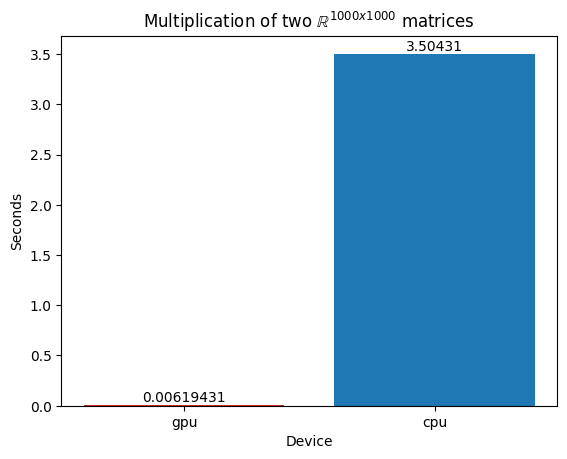

In [13]:
def plot_times(times):
    _, ax = plt.subplots()

    bars = ax.bar(["gpu","cpu"] ,times, color = ("tab:red", "tab:blue"))
    ax.bar_label(bars)
    ax.set_xlabel("Device")
    ax.set_ylabel("Seconds")
    plt.title("Multiplication of two $\mathbb{R}^{1000 x 1000}$ matrices")

    plt.show()


plot_times(times)

# Automatic differentiation

PyTorch can automatically compute the multivariate derivative of most expressions, allowing one to easily implement gradient descent methods (see the [least squares notebook]()).

Automatic differentiation is the default whenever tensors are declared setting "requires_grad=True", as in:

```python
x = torch.tensor([1,2,3], requires_grad=True)
```

After that any expression involving such tensor (e.g., one may want to compute `x**2`) will also store the information relevant to compute the gradient of the expression.

To recover the gradient one needs to call the method `backward()` on the expression itself. The method will populate the attribute `grad` in all tensors involved in the expression.

**example**:


In [14]:
x = torch.tensor([3.0], requires_grad=True)
exp = x**2

exp.backward()

print(x.grad) # prints tensor([6.]) (the value of the derivative of the x**2 function evaluated at x=3.0).

tensor([6.])


Let's use this new knowledge to plot the tangent to $f(x) = \frac{sin(x)}{x}$.

In [19]:

def sinx_over_x(x):
    return torch.sin(x)/x

def plot_fun(x0):
    x = torch.tensor(np.linspace(-20,20,100), device="cpu", dtype=torch.float32, requires_grad=False)
    y = sinx_over_x(x)


    x0 = torch.tensor(x0, device="cpu", dtype=torch.float32, requires_grad=True)

    y0 = sinx_over_x(x0)
    y0.backward()
    grad = x0.grad

    tangent_line = grad*(x-x0) + y0

    with torch.no_grad():
      plt.plot(x0, y0, "ro")
      plt.plot(x, tangent_line)

    plt.plot(x,y)
    plt.ylim(-0.6,1.3)
    plt.show()



interactive(children=(FloatSlider(value=1.0, description='x0', max=20.0, min=-20.0), Output()), _dom_classes=(…

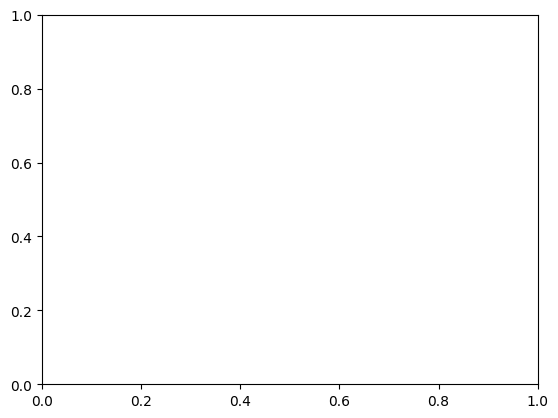

In [18]:
interactive(plot_fun, x0=FloatSlider(min=-20, max=20, step=0.1, value=1))